#Project: G2M insight for Cab Investment Firm

##Problem statement

**The Client**

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

**Project delivery:**

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights.

**Data Set:**

You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users

##Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

pd.set_option("display.float_format", lambda x: "%.5f" % x)

##Reading the datasets

In [2]:
cab_data = pd.read_csv("/content/Cab_Data.csv")
city_data = pd.read_csv("/content/City.csv")
customer_data = pd.read_csv("/content/Customer_ID.csv")
transaction_data = pd.read_csv("/content/Transaction_ID.csv")

##Datasets Overview & Cleaning

###Cab Data

In [3]:
cab_data.shape

(359392, 7)

There are 359,392 observations and 7 columns in the cab dataset

In [4]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45000,370.95000,313.63500
1,10000012,42375,Pink Cab,ATLANTA GA,28.62000,358.52000,334.85400
2,10000013,42371,Pink Cab,ATLANTA GA,9.04000,125.20000,97.63200
3,10000014,42376,Pink Cab,ATLANTA GA,33.17000,377.40000,351.60200
4,10000015,42372,Pink Cab,ATLANTA GA,8.73000,114.62000,97.77600


In [5]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


Attributes `Transaction ID`, `Date of Travel`, `KM-Travelled`, `Price Charged` and `Cost of Trip` are numerical data types

`Company` and `City` are object data types

In [6]:
cab_data.isnull().sum()

,0
Transaction ID,0
Date of Travel,0
Company,0
City,0
KM Travelled,0
Price Charged,0
Cost of Trip,0


No null values in the dataset

In [7]:
cab_data.duplicated().sum()

0

There are no duplicate entries in the dataset

In [8]:
cab_data.describe(include = "all")

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
count,359392.00000,359392.00000,359392,359392,359392.00000,359392.00000,359392.00000
unique,NaN,NaN,2,19,NaN,NaN,NaN
top,NaN,NaN,Yellow Cab,NEW YORK NY,NaN,NaN,NaN
freq,NaN,NaN,274681,99885,NaN,NaN,NaN
mean,10220761.18536,42964.06800,NaN,NaN,22.56725,423.44331,286.19011
std,126805.80371,307.46720,NaN,NaN,12.23353,274.37891,157.99366
min,10000011.00000,42371.00000,NaN,NaN,1.90000,15.60000,19.00000
25%,10110809.75000,42697.00000,NaN,NaN,12.00000,206.43750,151.20000
50%,10221035.50000,42988.00000,NaN,NaN,22.44000,386.36000,282.48000
75%,10330937.25000,43232.00000,NaN,NaN,32.96000,583.66000,413.68320


*   `Transaction ID` is a unique identifier column
*   There are 2 unique values in the `Company` column and 19 in the `City` column


*   The longest distance travelled is 48 Kilometres and the shortest is 1.9 Kilometres. The mean distance travelled is about 22.5 Kilometres
*   Mean Price charged for a trip is 423 dollars. Highest price is about 2048 dollars


*   The mean cost of a trip is about 286 dollars and the highest cost is 691 dollars

###Transforming the Date of Travel column into datetime format

In [9]:
cab_data["Date"] = pd.to_datetime(cab_data["Date of Travel"], origin = "1899-12-30", unit = "D")

In [10]:
cab_data["Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 359392 entries, 0 to 359391
Series name: Date
Non-Null Count   Dtype         
--------------   -----         
359392 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.7 MB


###City Data

In [11]:
city_data.shape

(20, 3)

There are 20 observations and 3 columns in the city dataset

In [12]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


The dataset includes the city name, population and number of cab users in each city

In [13]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


All 3 columns are object data types. However the columns `Population` and `Users` seem to be of the wrong data type and will require further investigation as they seem to contain integer values as seen from the first 5 rows of the dataset

In [14]:
city_data.isnull().sum()

,0
City,0
Population,0
Users,0


There are no null values

In [15]:
city_data.duplicated().sum()

0

There are no duplicate entries

###Cleaning the population and users columns

In [16]:
print(city_data["Population"].tolist())
print(city_data["Users"].tolist())

[' 8,405,837 ', ' 1,955,130 ', ' 1,595,037 ', ' 1,339,155 ', ' 1,177,609 ', ' 1,030,185 ', ' 959,307 ', ' 943,999 ', ' 942,908 ', ' 814,885 ', ' 754,233 ', ' 698,371 ', ' 671,238 ', ' 631,442 ', ' 629,591 ', ' 545,776 ', ' 542,085 ', ' 418,859 ', ' 327,225 ', ' 248,968 ']
[' 302,149 ', ' 164,468 ', ' 144,132 ', ' 17,675 ', ' 27,247 ', ' 12,994 ', ' 69,995 ', ' 6,133 ', ' 22,157 ', ' 24,701 ', ' 12,421 ', ' 14,978 ', ' 25,063 ', ' 5,712 ', ' 213,609 ', ' 7,044 ', ' 3,643 ', ' 127,001 ', ' 9,270 ', ' 80,021 ']


The numbers in this columns are strings, separated with commas and with leading and trailing whitespaces

In [17]:
#stripping the white spaces and removing the commas
city_data["Population"] = city_data["Population"].str.strip().str.replace(",", "")
city_data["Users"] = city_data["Users"].str.strip().str.replace(",", "")

In [18]:
#converting to integers
city_data[["Population", "Users"]] = city_data[["Population", "Users"]].apply(pd.to_numeric)

In [19]:
city_data[["Population", "Users"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Population  20 non-null     int64
 1   Users       20 non-null     int64
dtypes: int64(2)
memory usage: 448.0 bytes


###Statistical summary

In [20]:
city_data.describe()

,Population,Users
count,20.00000,20.00000
mean,1231592.00000,64520.65000
std,1740126.69978,83499.37529
min,248968.00000,3643.00000
25%,608637.25000,11633.25000
50%,784559.00000,23429.00000
75%,1067041.00000,91766.00000
max,8405837.00000,302149.00000


The most populated city in the dataset has a population of over 8.4 million

The highest number of cab users in a city is over 302,000

###Customer Data

In [21]:
customer_data.shape

(49171, 4)

There are 49171 observations and 4 columns

In [22]:
customer_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


The customer dataset includes the Customer ID of each customer, their gender, age and monthly income

In [23]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


The columns `Customer ID`, `Age` and `Income` are integers while `Gender` is of object data type

In [24]:
customer_data.isnull().sum()

,0
Customer ID,0
Gender,0
Age,0
Income (USD/Month),0


There are no null values

In [25]:
customer_data.duplicated().sum()

0

There are no duplicate entries in the dataset

In [26]:
customer_data.describe(include="all")

,Customer ID,Gender,Age,Income (USD/Month)
count,49171.00000,49171,49171.00000,49171.00000
unique,NaN,2,NaN,NaN
top,NaN,Male,NaN,NaN
freq,NaN,26562,NaN,NaN
mean,28398.25228,NaN,35.36312,15015.63186
std,17714.13733,NaN,12.59907,8002.20825
min,1.00000,NaN,18.00000,2000.00000
25%,12654.50000,NaN,25.00000,8289.50000
50%,27631.00000,NaN,33.00000,14656.00000
75%,43284.50000,NaN,42.00000,21035.00000


*   Customer ID values are unique identifiers
*   Two unique values in the Gender column with "Male" being the most frequent

*   The age range in the dataset is 18 - 65 years old
*   Highest monthly income is 35,000 USD and the lowest is 2,000 USD

###Transaction Data

In [27]:
transaction_data.shape

(440098, 3)

There are 440,098 observations and 3 columns

In [28]:
transaction_data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


The dataset contains information about each transactions and it includes Transaction ID, Customer ID and Payment mode.

In [29]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


The column `Payment_Mode` is of object type while the rest are integers

In [30]:
transaction_data.isnull().sum()

,0
Transaction ID,0
Customer ID,0
Payment_Mode,0


There are no null values

In [31]:
transaction_data.duplicated().sum()

0

There are no duplicate entries in this dataset

In [32]:
transaction_data.describe(include="all")

,Transaction ID,Customer ID,Payment_Mode
count,440098.00000,440098.00000,440098
unique,NaN,NaN,2
top,NaN,NaN,Card
freq,NaN,NaN,263991
mean,10220059.50000,23619.51312,NaN
std,127045.49372,21195.54982,NaN
min,10000011.00000,1.00000,NaN
25%,10110035.25000,3530.00000,NaN
50%,10220059.50000,15168.00000,NaN
75%,10330083.75000,43884.00000,NaN


Payment_Mode contains two unique values with Card being the most frequent

##Creating the master data

In this analysis, I am working with 4 datasets: `cab_data`, `customer_data`, `city_data` and `transaction_data`.

`cab_data` includes details of transactions for two cab companies

`customer_data` is a mapping table that contains a unique identifier which links the customer"s demographic details.

`transaction_data` is a mapping table that contains transaction to customer mapping and payment mode


`city_data` contains US cities, their population and number of cab users.

`transaction_data` has a primary key **Transaction ID** which uniquely identifies each transaction. Transaction ID is referenced in cab_data to link transactions to specific cab rides.

`customer_data` has a primary key **Customer ID** which uniquely identifies each customer and their demographic details. transaction_data references **Customer ID** to link details of transactions to a specific customer

In [33]:
data = cab_data.merge(transaction_data, how = "left", on = "Transaction ID")

In [34]:
data = data.merge(customer_data, how = "left", on = "Customer ID")

In [35]:
data = data.merge(city_data, how = "left", on = "City")

In [36]:
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45000,370.95000,313.63500,2016-01-08,29290,Card,Male,28,10813,814885,24701
1,10000012,42375,Pink Cab,ATLANTA GA,28.62000,358.52000,334.85400,2016-01-06,27703,Card,Male,27,9237,814885,24701
2,10000013,42371,Pink Cab,ATLANTA GA,9.04000,125.20000,97.63200,2016-01-02,28712,Cash,Male,53,11242,814885,24701
3,10000014,42376,Pink Cab,ATLANTA GA,33.17000,377.40000,351.60200,2016-01-07,28020,Cash,Male,23,23327,814885,24701
4,10000015,42372,Pink Cab,ATLANTA GA,8.73000,114.62000,97.77600,2016-01-03,27182,Card,Male,33,8536,814885,24701


In [37]:
data.isnull().sum()

,0
Transaction ID,0
Date of Travel,0
Company,0
City,0
KM Travelled,0
Price Charged,0
Cost of Trip,0
Date,0
Customer ID,0
Payment_Mode,0


In [38]:
data.duplicated().sum()

0

There are no null values and duplicates in the master dataset

##Cleaning the master dataset

In [39]:
df = data.copy()

In [40]:
#dropping date of travel column
df = df.drop("Date of Travel", axis = 1)

In [41]:
#renaming the income column
df.rename(columns = {"Income (USD/Month)" : "Income"}, inplace = True)

###Extracting properties from the Date column

In [42]:
#extracting the year, month
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month


###Extracting seasons

In [43]:
def get_season(month):
  """
  This function assign seasons to the months in the dataset
  """
  if month in [12, 1, 2]:
    return "Winter"
  elif month in [3, 4, 5]:
    return "Spring"
  elif month in [6, 7, 8]:
    return "Summer"
  else:
    return "Autumn"

In [44]:
df["Season"] = df["Month"].apply(get_season)

In [45]:
#creating a profit column to display the profit made for each ride
df["Profit"] = df["Price Charged"] - df["Cost of Trip"]

In [46]:
df.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Customer ID,Payment_Mode,Gender,Age,Income,Population,Users,Year,Month,Season,Profit
0,10000011,Pink Cab,ATLANTA GA,30.45000,370.95000,313.63500,2016-01-08,29290,Card,Male,28,10813,814885,24701,2016,1,Winter,57.31500
1,10000012,Pink Cab,ATLANTA GA,28.62000,358.52000,334.85400,2016-01-06,27703,Card,Male,27,9237,814885,24701,2016,1,Winter,23.66600
2,10000013,Pink Cab,ATLANTA GA,9.04000,125.20000,97.63200,2016-01-02,28712,Cash,Male,53,11242,814885,24701,2016,1,Winter,27.56800
3,10000014,Pink Cab,ATLANTA GA,33.17000,377.40000,351.60200,2016-01-07,28020,Cash,Male,23,23327,814885,24701,2016,1,Winter,25.79800
4,10000015,Pink Cab,ATLANTA GA,8.73000,114.62000,97.77600,2016-01-03,27182,Card,Male,33,8536,814885,24701,2016,1,Winter,16.84400


#EDA

###Company

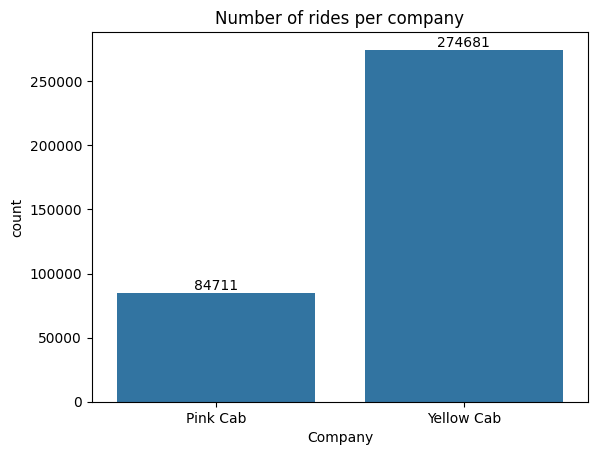

In [47]:
ax = sns.countplot(data = df, x = "Company")
ax.bar_label(ax.containers[0])
ax.set_title("Number of rides per company")
plt.show()

The Yellow Cab company has more total number of rides

###Company vs City

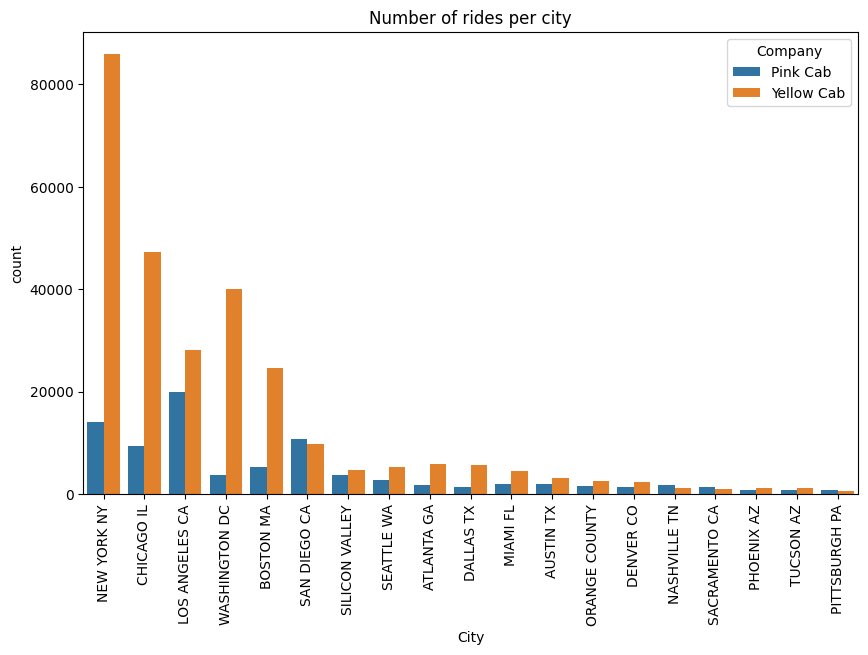

In [48]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=cab_data, x = "City", hue = "Company", order = df["City"].value_counts().index)
ax.set_title("Number of rides per city")
plt.xticks(rotation=90)
plt.show()

The city of New York has the highest number of rides in the dataset

The Yellow Cab is more popular in most of these cities, especially those with larger number of rides

The Pink Cab, however, is slightly more popular in San Diego, Nashville, Sacramento and Pittsburgh

### Company vs Cost of a Trip

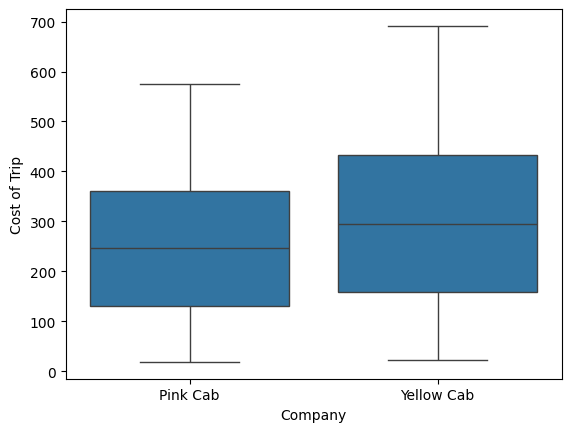

In [49]:
sns.boxplot(data=df, x = "Company", y = "Cost of Trip")
plt.show()

Median cost of a trip in the Yellow Cab company is slightly higher, so is the maximum cost of a trip

###Company vs Price Charged

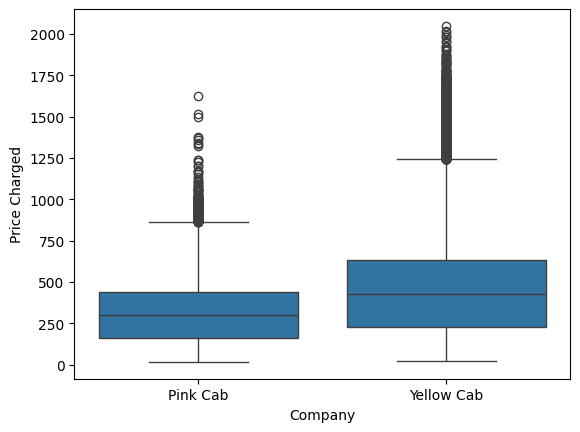

In [50]:
sns.boxplot(data=df, x = "Company", y = "Price Charged")
plt.show()

Same with the price charged, the yellow cab rides are on average costlier.

 The outliers present can be explained factors such as traffic conditions, waiting time, surge pricing due to high demand etc

###Company vs Profit


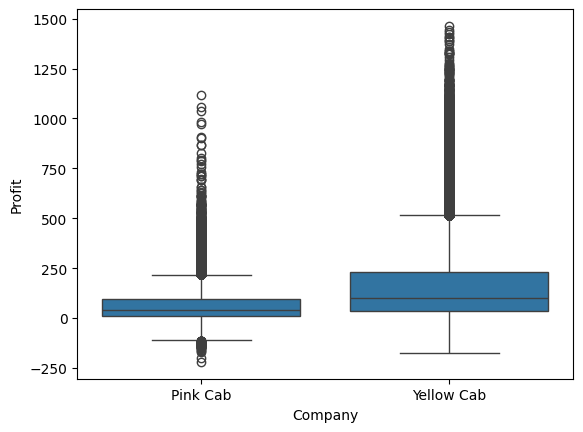

In [51]:
sns.boxplot(data=df, x = "Company", y = "Profit" )
plt.show()

The Yellow Cab company on average is making more profit

###Distance traveled vs cost vs price charged

In [52]:
cols = ["KM Travelled", "Cost of Trip", "Price Charged"]

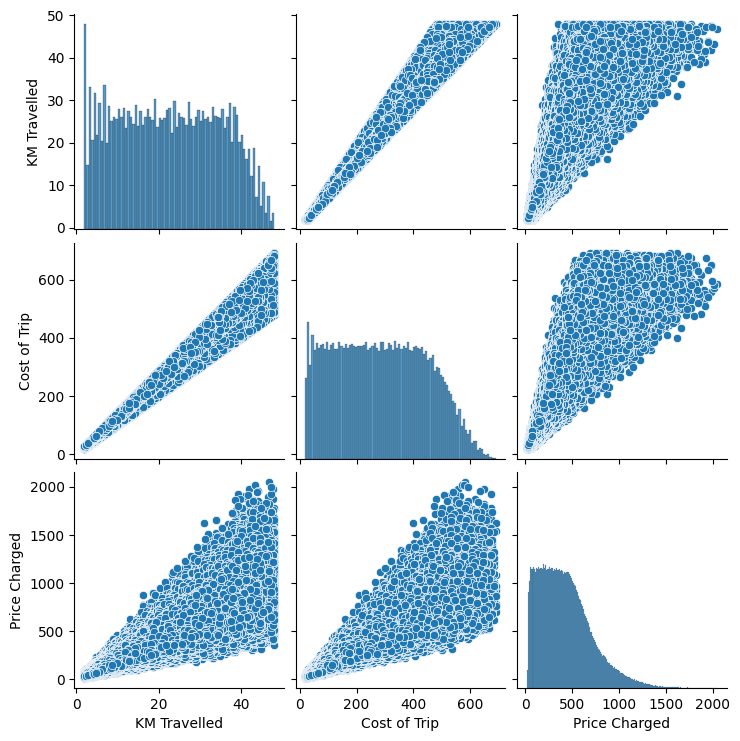

In [53]:
sns.pairplot(cab_data[cols])
plt.show()

Distance Traveled is closely related to both the cost of trip and price charged, with higher distances leading to higher cost and prices

###Average transactions per customer for each company

In [54]:
df.groupby("Company")["Customer ID"].nunique()

,Customer ID
Company,
Pink Cab,32330
Yellow Cab,39896


In [55]:
df.groupby("Company")["Transaction ID"].nunique()

,Transaction ID
Company,
Pink Cab,84711
Yellow Cab,274681


In [56]:
print("The average number of transactions per customer for the Yellow cabs is: ", round(274681 / 39896))
print("The average number of transactions per customer for the Pink cabs is: ", round(84711 / 32330))

The average number of transactions per customer for the Yellow cabs is:  7
The average number of transactions per customer for the Pink cabs is:  3


**This suggests that the Yellow cab company has better customer retention**

###Payment Mode

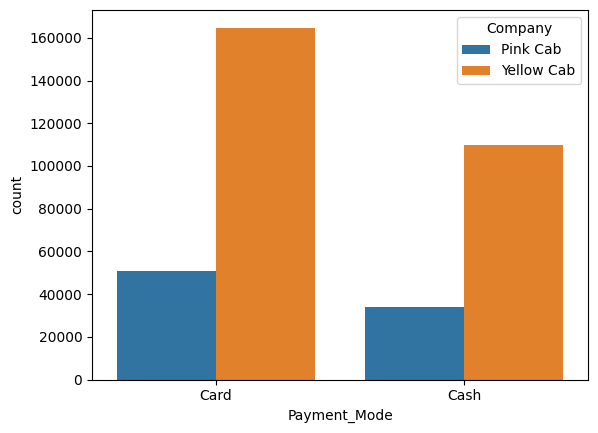

In [57]:
sns.countplot(data=df, x = "Payment_Mode", hue = "Company")
plt.show()

Paying with Card is more common among the customers of both cab companies

###Seasonality Analysis

In [58]:
season_rides = df.groupby(["Company","Season"], as_index = False)["Transaction ID"].count()
season_profit = df.groupby(["Company","Season"], as_index = False)["Profit"].sum()

Text(0.5, 1.0, 'Profit per season')

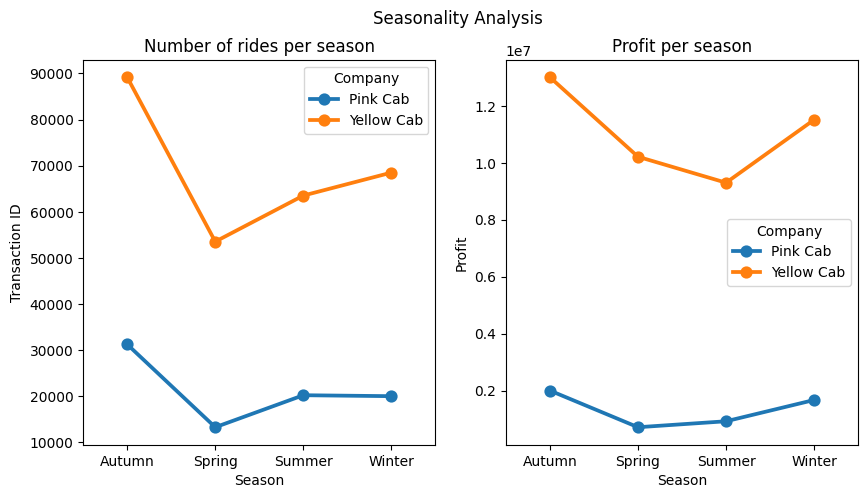

In [59]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
fig.suptitle("Seasonality Analysis")

sns.pointplot(data=season_rides, x = "Season", y = "Transaction ID", hue = "Company", ax = ax[0])
sns.pointplot(data=season_profit, x = "Season", y = "Profit", hue = "Company", ax = ax[1])
ax[0].set_title("Number of rides per season")
ax[1].set_title("Profit per season")

The number of rides are highest during Autumn for both companies and it is lowest during spring

The highest profit realised per season is highest during Autumn.

However, for the Yellow cab company the season with the lowest profit is Summer and for the Pink cab company - Spring

###Yearly analysis

In [60]:
year_rides = df.groupby(["Company","Year"], as_index = False)["Transaction ID"].count()
year_profit = df.groupby(["Company","Year"], as_index = False)["Profit"].sum()

Text(0.5, 1.0, 'Profit per year')

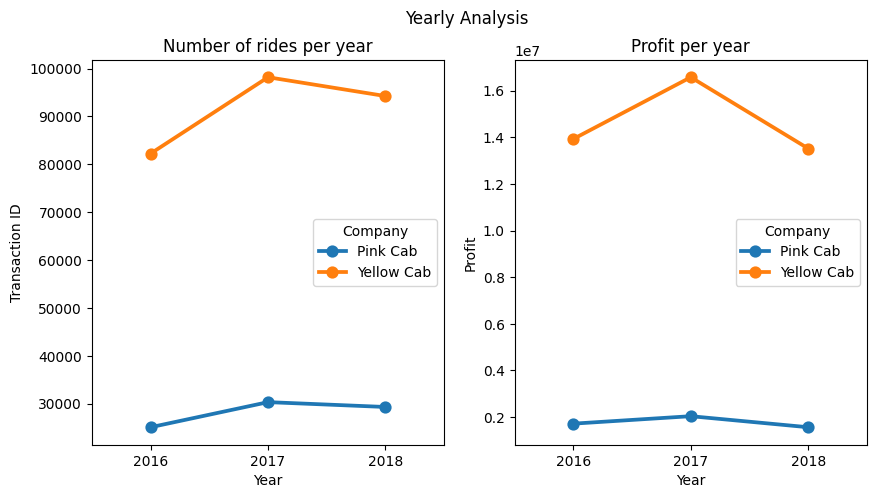

In [61]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
fig.suptitle("Yearly Analysis")

sns.pointplot(data=year_rides, x = "Year", y = "Transaction ID", hue = "Company", ax = ax[0])
sns.pointplot(data=year_profit, x = "Year", y = "Profit", hue = "Company", ax = ax[1])
ax[0].set_title("Number of rides per year")
ax[1].set_title("Profit per year")

The highest number of rides and highest amount of profit was realised in 2017 for both companies and there was a decline between 2017 and 2018

###Monthly Analysis

In [62]:
monthly_rides = df.groupby(["Company","Month"], as_index = False)["Transaction ID"].count()
monthly_profit = df.groupby(["Company","Month"], as_index = False)["Profit"].sum()

Text(0.5, 1.0, 'Profit per month')

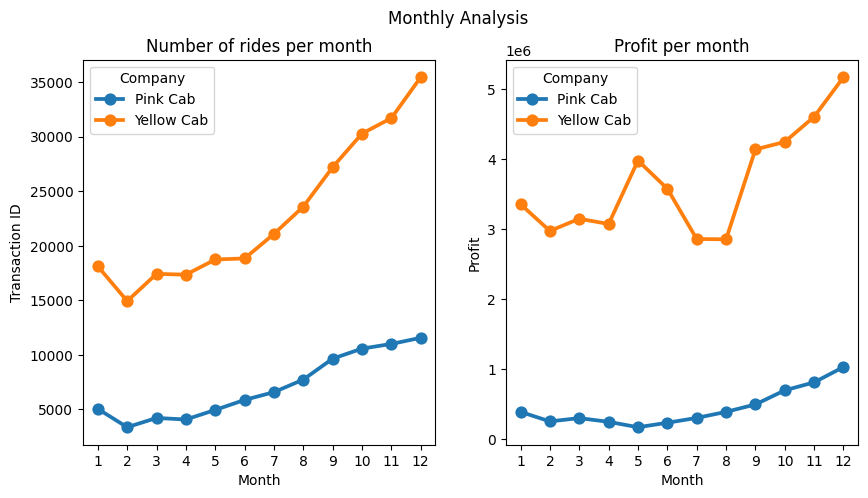

In [63]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
fig.suptitle("Monthly Analysis")

sns.pointplot(data=monthly_rides, x = "Month", y = "Transaction ID", hue = "Company", ax = ax[0])
sns.pointplot(data=monthly_profit, x = "Month", y = "Profit", hue = "Company", ax = ax[1])
ax[0].set_title("Number of rides per month")
ax[1].set_title("Profit per month")

Through the years 2016-2018, The number of rides is on a steady increase monthly, however there is a dip in february for both cab companies

In terms of profit, the yellow cab earns more in profit but with more volatility as seen with the sharp increase and dips between May and September.

The pink cab profit is on a more steady and consistent increase

###Customer Analysis

creating a new dataframe containing income class, age brackets

In [64]:
cust_df = df[["Customer ID", "Company", "Gender", "Age", "Income"]].copy()

In [65]:
def age_brackets (age):
  """
  This function creates age brackets for the customers
  """
  if age >= 18 and age <= 25:
    return "18-25"
  elif age >= 26 and age <= 44:
    return "26-44"
  elif age >= 45 and age <= 60:
    return "45-60"
  else:
    return ">60"

In [66]:
cust_df["Age_bracket"] = cust_df["Age"].apply(age_brackets)

In [67]:
def income_class (income):
  """
  This function creates income class for the customers
  """
  if income <= 2500:
    return "Lower Class"
  elif income > 2500 and income <= 12500:
    return "Middle Class"
  else:
    return "Upper Class"

In [68]:
cust_df["Income_class"] = cust_df["Income"].apply(income_class)

In [69]:
cust_df.drop(["Income", "Age"], axis=1, inplace=True)

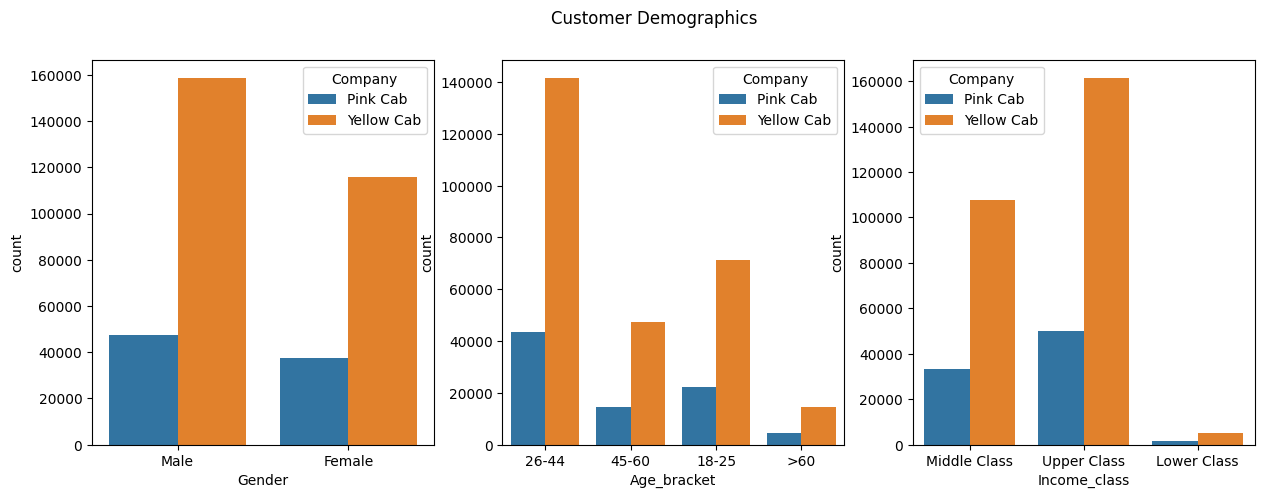

In [70]:
fig, ax = plt.subplots(1,3, figsize = (15,5))
fig.suptitle("Customer Demographics")

sns.countplot(data=cust_df, x = "Gender", hue = "Company", ax = ax[0])
sns.countplot(data=cust_df, x = "Age_bracket", hue = "Company", ax = ax[1])
sns.countplot(data=cust_df, x = "Income_class", hue = "Company", ax = ax[2])
plt.show()

The Yellow cab company has significantly more male customers. The gender gap is smaller for the pink cabs.

Both cab companies are popular among the 26-44 age group and they both have few customers in the over 60 group

Both companies have the highest number of customers in the Upper class brackets

#Hypothesis testing

##Is the choice of the cab (pink or yellow) dependent on the customer's income class?

**Null hypothesis: Cab choice is independent of income class**

**Alternate hypothesis: The cab choice is dependent on income class**

**Level of significance: 0.05**

**The chi-square test of independence will be used to perform this test**

In [71]:
#contigency table
ct = pd.crosstab(cust_df["Company"], cust_df["Income_class"])
ct

Income_class,Lower Class,Middle Class,Upper Class
Company,,,
Pink Cab,1709,33084,49918
Yellow Cab,5302,107916,161463


In [72]:
chi, p_val, dof, expected = stats.chi2_contingency(ct)
p_val

0.16123514308173145

In [73]:
#comparing the p_value with the level of significance
if p_val > 0.05:
  print("The p_value", p_val,"is greater than the level of significance therefore we fail to reject the null hypothesis")
else:
  print("The p_value", p_val,"is less than the level of significance therefore we reject the null hypothesis")

The p_value 0.16123514308173145 is greater than the level of significance therefore we fail to reject the null hypothesis


Conclusion: There is enough statistical evidence that suggests the cab choice of the customers is independent of their income class

##Is the choice of the cab (pink or yellow) dependent on the customer's gender?

**Null hypothesis: Cab choice is independent of gender**

**Alternate hypothesis: The cab choice is dependent on gender**

**Level of significance: 0.05**

**The chi-square test of independence will be used to perform this test**

In [74]:
#contigency table
ct = pd.crosstab(cust_df["Company"], cust_df["Gender"])
ct

Gender,Female,Male
Company,,
Pink Cab,37480,47231
Yellow Cab,116000,158681


In [75]:
chi, p_val, dof, expected = stats.chi2_contingency(ct)
p_val

3.982674650131372e-25

In [76]:
#comparing the p_value with the level of significance
if p_val > 0.05:
  print("The p_value", p_val,"is greater than the level of significance therefore we fail to reject the null hypothesis")
else:
  print("The p_value", p_val,"is less than the level of significance therefore we reject the null hypothesis")

The p_value 3.982674650131372e-25 is less than the level of significance therefore we reject the null hypothesis


Conclusion: There is enough statistical evidence that suggests the cab choice of the customers is dependent on their gender

#Is the average profit the same for mode of payments for the pink cab?

**Null hypothesis: average profit for cash mode is equal to average profit for card mode**

**Alternate hypothesis: average profit for both modes of payment is unequal**

**Level of significance: 0.05**

**The chi-square test of independence will be used to perform this test**

In [77]:
df_pinkcab = df[df["Company"] == "Pink Cab"]

In [78]:
card_profit = df_pinkcab[df_pinkcab["Payment_Mode"] == "Card"]["Profit"]
cash_profit = df_pinkcab[df_pinkcab["Payment_Mode"] == "Cash"]["Profit"]

In [79]:
print("Standard deviation of the margins with card payment is: ", round(card_profit.std(),2))
print("Standard deviation of the margins with cash payment is: ", round(cash_profit.std(),2))

Standard deviation of the margins with card payment is:  77.5
Standard deviation of the margins with cash payment is:  77.73


In [80]:
test_stat, p_val = stats.ttest_ind(card_profit, cash_profit, equal_var = True, alternative = "two-sided" )
p_val

0.7900465828793286

In [81]:
if p_val > 0.05:
  print("The p_value", p_val,"is greater than the level of significance therefore we fail to reject the null hypothesis")
else:
  print("The p_value", p_val,"is less than the level of significance therefore we reject the null hypothesis")


The p_value 0.7900465828793286 is greater than the level of significance therefore we fail to reject the null hypothesis


There is enough statistical evidence to suggest the average profit is not different between the mode of payments for the pink cab

#Is the average profit the same for mode of payments for the yellow cab?

In [82]:
df_yellowcab = df[df["Company"] == "Yellow Cab"]

In [83]:
card_profit = df_yellowcab[df_yellowcab["Payment_Mode"] == "Card"]["Profit"]
cash_profit = df_yellowcab[df_yellowcab["Payment_Mode"] == "Cash"]["Profit"]

In [84]:
print("Standard deviation of the margins with card payment is: ", round(card_profit.std(),2))
print("Standard deviation of the margins with cash payment is: ", round(cash_profit.std(),2))

Standard deviation of the margins with card payment is:  171.33
Standard deviation of the margins with cash payment is:  172.56


In [85]:
test_stat, p_val = stats.ttest_ind(card_profit, cash_profit, equal_var = True, alternative = "two-sided" )
p_val

0.2933060638298729

In [86]:
if p_val > 0.05:
  print("The p_value", p_val,"is greater than the level of significance therefore we fail to reject the null hypothesis")
else:
  print("The p_value", p_val,"is less than the level of significance therefore we reject the null hypothesis")

The p_value 0.2933060638298729 is greater than the level of significance therefore we fail to reject the null hypothesis


There is enough statistical evidence to suggest the average profit is not different between the mode of payments for the yellow cab

#Summary


*   The yellow cab company has a much larger customer base than the pink cab company
*   Profits for both companies was highest in 2017 and both experienced a decline in 2018


*   On average, the yellow cab rides have higher prices
*   The yellow cab company has better customer retention, given the average number of transactions per customer is higher



*   There is statistical evidence that a customer's cab choice depends on their gender




